# Importing Necessary Libraries:

In [4]:
# Owen L.

import pandas as pd
import numpy as np

import time

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

# Verifying Integrity of Numerical Columns:

In [7]:
school_data = pd.read_csv('data_files/BASE_clean_college_score_card_data.csv', index_col=0)

# For clustering
numeric_school_data = school_data.iloc[:,3:]

#------------------------------------------------------------------------------
# This next section will impute the data, and verify the integrity of the data.
#------------------------------------------------------------------------------

# Resolving any NaN values using Imputation
# Credit to O.rka at https://stackoverflow.com/questions/33660836/impute-entire-dataframe-all-columns-using-scikit-learn-sklearn-without-itera
fill_NaN = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(numeric_school_data))
imputed_DF.columns = numeric_school_data.columns
imputed_DF.index = numeric_school_data.index

def verify_data(dataframe):
    # Check for incorrect column types
    for i in range(len(dataframe.dtypes)):
        if dataframe.dtypes[i] != dataframe.dtypes[1]:
            print(dataframe.dtypes[i])

    print("No other bad dtypes.")

    # Check for NaN values
    dataframe.isnull().values.any()

    print("No other NaN values.")

    print(np.where(np.isnan(dataframe)))
    
    # Checking each value for infinite values
    for i in range(len(dataframe.columns)):
        for j in range(len(dataframe.index)):
            if np.isfinite(dataframe.iloc[j,i]) == False:
                print(j,i)
                print(dataframe.iloc[j,i])

    print("No other non-finite values.")
    
    for col in dataframe.columns:
        if len(dataframe[col].unique()) == 1:
            print("WARNING:", col, "has only 1 unique value (0 variance) and may cause issues when scaling")
    print("No other 0 variance columns found.\n")
    
verify_data(imputed_DF)

# Not sure why curroper remained in our data after it was removed, removing it again.
imputed_DF = imputed_DF.drop(columns=['CURROPER'])
verify_data(imputed_DF)

scaled_imputed_df = pd.DataFrame(scale(imputed_DF))
scaled_imputed_df.columns = imputed_DF.columns
scaled_imputed_df
        

No other bad dtypes.
No other NaN values.
(array([], dtype=int64), array([], dtype=int64))
No other non-finite values.
No other 0 variance columns found.

No other bad dtypes.
No other NaN values.
(array([], dtype=int64), array([], dtype=int64))
No other non-finite values.
No other 0 variance columns found.



,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,ANNHI,TRIBAL,AANAPII,...,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GT_28K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,-0.098265,1.081687,1.299137,-1.313341,-8.439129e-01,8.074573,-0.127099,-0.066126,-0.075666,-0.144346,...,1.065677e+00,-1.373070e+00,-0.318302,-0.436556,-3.021465e-01,2.238583,2.238583e+00,-1.257801,0.000000,-1.719010e+00
1,-0.098265,1.081687,1.299137,-1.313341,-8.439129e-01,-0.131114,-0.127099,-0.066126,-0.075666,-0.144346,...,1.272749e-01,-6.809865e-01,0.422269,0.926852,9.203259e-01,0.752163,7.521628e-01,0.341933,0.000000,3.867788e-01
2,-0.098265,1.081687,1.299137,-0.120011,-8.439129e-01,-0.131114,-0.127099,-0.066126,-0.075666,-0.144346,...,1.355722e+00,2.175700e+00,0.306101,0.857419,3.763257e-01,0.896080,8.960802e-01,-1.395112,0.000000,-4.730666e-16
3,-0.098265,1.081687,1.299137,-1.313341,-8.439129e-01,-0.131114,-0.127099,-0.066126,-0.075666,-0.144346,...,-1.997325e-01,-7.306840e-01,0.821596,1.027845,1.030348e+00,0.862994,8.629942e-01,0.553829,0.000000,-2.142554e-02
4,-0.098265,1.081687,1.299137,-1.313341,-8.439129e-01,8.074573,-0.127099,-0.066126,-0.075666,-0.144346,...,1.233895e+00,-1.320152e+00,-0.557899,-0.815280,-7.911354e-01,2.068388,2.068388e+00,-1.469837,0.000000,-2.092274e+00
5,-0.098265,1.081687,1.299137,-1.313341,-7.364798e-01,-0.131114,-0.127099,-0.066126,-0.075666,-0.144346,...,-3.147697e-01,-1.395618e+00,0.661865,1.090966,1.213719e+00,0.950543,9.505428e-01,0.881589,0.000000,1.587530e+00
6,-0.098265,0.129233,-0.199152,-1.313341,1.304748e+00,-0.131114,-0.127099,-0.066126,-0.075666,-0.144346,...,-6.063231e-01,-5.581232e-01,-0.557899,-0.354499,-5.221915e-01,-0.927056,-9.270555e-01,-1.270987,-2.044046,-4.730666e-16
7,-0.098265,1.081687,0.549992,-1.313341,1.197315e+00,-0.131114,-0.127099,-0.066126,-0.075666,-0.144346,...,6.085454e-01,1.348789e+00,0.240756,0.825859,8.041910e-01,0.230275,2.302749e-01,0.279698,0.000000,-4.730666e-16
8,-0.098265,1.081687,1.299137,-1.313341,-8.439129e-01,-0.131114,-0.127099,-0.066126,-0.075666,-0.144346,...,2.728630e-01,-7.297637e-01,-0.151311,0.592312,4.007751e-01,0.960482,9.604823e-01,-0.100155,0.000000,-2.320664e+00
9,-0.098265,1.081687,1.299137,-1.313341,-7.364798e-01,-0.131114,-0.127099,-0.066126,-0.075666,-0.144346,...,-5.889732e-01,-1.571860e+00,0.974067,1.381321,1.501000e+00,0.706823,7.068227e-01,1.630012,0.000000,2.104816e+00


# Creating PCA Model and Showing Variances:

The first 20 components explain 59.286% of the variance in this data.
(0.9039826555509374, 62)

These are the principle components that explain more tha 1% of variance
[0.1709604315972848, 0.07928318918891998, 0.0506792114419331, 0.04173602249486683, 0.025392436042349857, 0.02408059447646263, 0.021946933931607418, 0.02094704236991085, 0.018568577541892624, 0.01721776162972449, 0.016458162334817443, 0.014475897030122512, 0.013403433067054804, 0.012841563099195262, 0.012232747701646042, 0.012122293875507584, 0.01042403621563706, 0.010235068436859148, 0.010012436600566103]


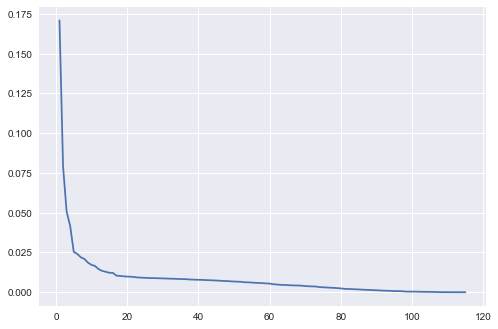

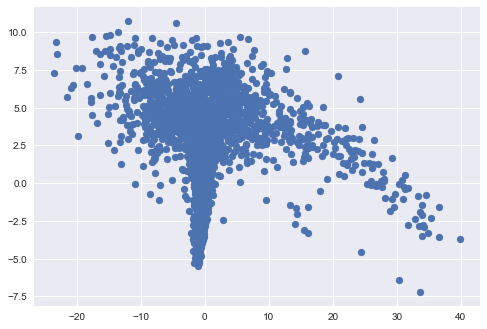

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61
Alabama A & M University,-14.741912,8.854229,3.719611,-0.669477,4.142774,1.269894,2.351294,0.629377,2.654409,-3.443715,...,-1.310237,-0.404382,-0.253114,-0.312216,0.122407,-0.343600,-0.159408,-0.244791,1.607314,0.121915
University of Alabama at Birmingham,5.390333,4.679672,3.830360,-0.820371,0.018490,3.258563,0.757467,-0.493043,-0.422693,-1.144920,...,-0.854126,0.269517,-0.206852,-0.446943,0.683032,-0.827595,0.287675,0.510435,-0.233836,0.353044
Amridge University,-0.737990,0.330584,0.056314,0.294997,4.367849,3.409969,-4.632500,0.155030,-1.000662,2.284510,...,-0.102229,-1.349911,1.394210,1.806425,-1.164760,-0.286262,-0.036078,-0.355259,1.876704,-2.182171
University of Alabama in Huntsville,11.718639,4.180379,6.176970,-0.353766,-0.736956,5.920892,0.308752,-0.025873,-1.818116,-1.348065,...,-1.482520,0.681038,1.256217,-0.092234,0.734715,0.284290,0.043641,-0.102783,-0.789260,0.966440
Alabama State University,-13.893483,8.387763,3.703856,-1.021874,5.470617,0.221356,3.019972,0.315810,4.382449,-3.615972,...,0.877746,-0.485021,-2.483535,-0.114230,-1.303444,1.944191,0.271874,-0.341870,1.630234,1.025287


In [27]:
pca_model = PCA()
snsd_PCA = pca_model.fit_transform(scaled_imputed_df)

def sum_variance_explained(pca_model, pca_component_limit, verbose=True):
    '''Finds the total variance explained within n number of components'''
    sum_of_components = 0
    for i in range(pca_component_limit):
        sum_of_components += pca_model.explained_variance_ratio_[i]
    if verbose == True:
        print("The first ", pca_component_limit, " components explain ", 
              round(sum_of_components*100, 3), "% of the variance in this data.", sep = "")
    return sum_of_components
    
def find_optimal_components(pca_model, tolerance):
    '''Finds the number of componenets needed to provide enough variance within the tolerance amount'''
    limit = 0
    sum_of_components = sum_variance_explained(pca_model, 0, verbose=False)
    while (1.00-sum_of_components > tolerance):
        sum_of_components = sum_variance_explained(pca_model, limit, verbose=False)
        limit += 1
    return sum_of_components, limit

# Examples of the functions defined above
sum_variance_explained(pca_model, 20)
print(find_optimal_components(pca_model, .10))

num_components_needed = find_optimal_components(pca_model, .10)[1]
    
# Plotting the explained variance for each principle component
list_of_PCA_variances = []
for i in range(len(pca_model.explained_variance_ratio_)):
    list_of_PCA_variances.append(pca_model.explained_variance_ratio_[i])
    
print("\nThese are the principle components that explain more tha 1% of variance")
components_to_use = []
for variance in list_of_PCA_variances:
    if variance > 0.01:
        components_to_use.append(variance)
print(components_to_use)

# This shows an extreme drop off for variances, which infers that we do not need a majority of these columns
# for clustering
plt.plot(np.linspace(1, len(pca_model.explained_variance_ratio_), 
                     len(scaled_imputed_df.columns)), list_of_PCA_variances)
plt.show()
plt.scatter(snsd_PCA[:,0],snsd_PCA[:,1])
plt.show()

column_names = []
for i in range(num_components_needed):
    header = "PC"
    component_number = str(i)
    column_names.append(header + component_number)

PCA_DF = pd.DataFrame(snsd_PCA[:,0:len(column_names)], columns=column_names, 
                      index=list(school_data.iloc[:,0]))

# Show the new points in R^n where n=dimensions left after PCA
PCA_DF.head()


# Running the Spectral Clustering Method:
Major problem: My computer cannot run the algorithm on all schools without blowing up, it takes over 2 hours 
with 5000 schools out of the nearly 6000+

In [30]:
# Example spectral clustering models, variables can be changed.
start = time.time()
clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=0).fit(PCA_DF.iloc[0:200,:])
print("Clusters:", set(clustering.labels_))
end = time.time()
print("\nTime taken: ", end="")
print(end - start)

/home/owen/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Clusters: {0, 1, 2, 3}

Time taken: 2.7284934520721436


# Testing KMeans

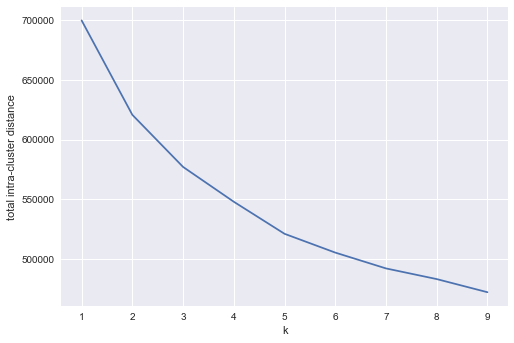

In [31]:
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(PCA_DF)
    scores.append(-model.score(PCA_DF))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

Unfortunately, we do not see a very clear drop-off here. The intracluster distance does not have a drop off point, which may indicate that this data is not clustered nicely. We may have some non-concave shapes.

# Testing DBSCAN 

In [39]:
def test_dbscan(eps, min_samples):
    db_model = DBSCAN(eps=eps, min_samples=min_samples)
    db_model.fit(PCA_DF)
    y_pred = db_model.fit_predict(PCA_DF)
    labels = db_model.labels_
    return labels

for i in range(1,1000,10):
    current_set = set(test_dbscan(i, 10))
    print(current_set)
    if i > 100 and len(current_set) == 1:
        break

{0, 1, 2, 3, -1}
{0, 1, 2, 3, 4, 5, -1}
{0, -1}
{0, -1}
{0, -1}
{0}
{0}
{0}
{0}
{0}
{0}
